# Exploratory Data Analysis

Exploratory Data Analysis is a way an engineer can get insights of data, pattern in the data.
However, there are some gaps between visualizing unstructured (text) data and structured data. 
For example, many text visualizations do not represent the text directly, they represent an output of a language model(word count, character length, word sequences, etc.)

Some approaches we follow:

Frequency Distribution plot

wordcloud

bar graph

distribution fill chart(sentence length analysis)

frequent and rare words

In [38]:
import warnings

warnings.filterwarnings("ignore")

In [1]:
corpus=["We may speak to each other, as a species, more than we write. It may even be easier to learn to speak than to write.",
       "Given the importance of this type of data,to understand and reason about natural language, just like we do for other types."]

## Identifying frequent words in corpus

In [30]:
from collections import Counter

def most_common_words(corpus,n=5):
    cnt = Counter()
    
    for text in corpus:
        for word in text.split():
            cnt[word] += 1
            
    words_counts=[(k,v)  for k,v in cnt.items()]   # list of word and counts of corpus
    freq_words=cnt.most_common(n)
    
    return freq_words



freq_10_words=most_common_words(corpus,n=10)
print(freq_10_words)

[('to', 4), ('may', 2), ('speak', 2), ('than', 2), ('we', 2), ('write.', 2), ('of', 2), ('We', 1), ('each', 1), ('other,', 1)]


## Identifying rare words in corpus

In [31]:
from collections import Counter

def least_common_words(corpus,n=5):
    cnt = Counter()
    
    for text in corpus:
        for word in text.split():
            cnt[word] += 1
            
    words_counts=[(k,v)  for k,v in cnt.items()]   # list of word and counts of corpus
    least_occurring=sorted(words_counts, key=lambda x:x[1], reverse=False)
    rare_words=least_occurring[:n]
    
    return rare_words


rare_10_words=least_common_words(corpus,n=10)
print(rare_10_words)

[('We', 1), ('each', 1), ('other,', 1), ('as', 1), ('a', 1), ('species,', 1), ('more', 1), ('It', 1), ('even', 1), ('be', 1)]


## Frequency distribution plot

top words [('to', 5), (',', 4), ('.', 3), ('may', 2), ('speak', 2), ('other', 2), ('than', 2), ('we', 2), ('write', 2), ('of', 2)]


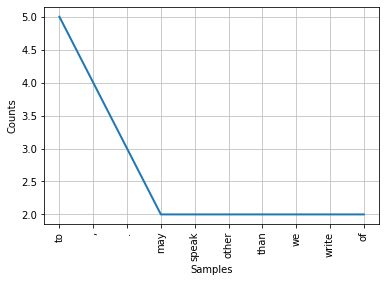

In [32]:
import nltk


def graph(corpus,n):
    token_lists = [nltk.tokenize.word_tokenize(text) for text in corpus]
    tokens=[word for tokens in token_lists for word in tokens ]  #Flattening list of list of tokens
    fd = nltk.FreqDist(tokens)     # passed list of tokens
    fd_words = fd.most_common(n)
    print("top words",fd_words)
    fd.plot(n,cumulative=False)   # plotting top 30 words
    
graph(corpus,10)

 # Barplot : Top occurring words

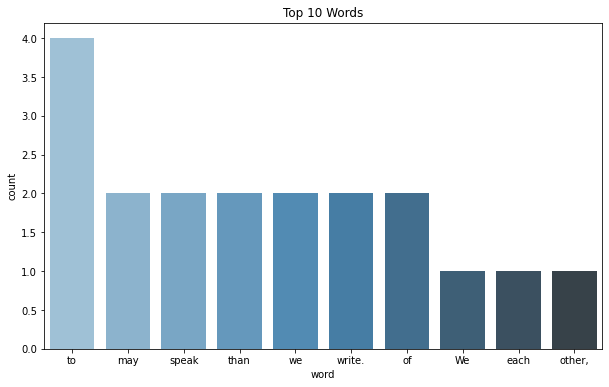

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def count_plot(corpus,n):
    
    plt.figure(figsize=(10,6))    
    cnt = Counter()
    
    for text in corpus:
        for word in text.split():
            cnt[word] += 1
            
    words_counts=[(k,v)  for k,v in cnt.items()]
    words_counts= sorted(words_counts, key=lambda x:x[1], reverse=True)
    
    df_count=pd.DataFrame(words_counts,columns=['word','count'])
    df_topn=df_count.iloc[:n]   # taking only top  n frequent words
    
    sns.barplot("word", "count", data=df_topn, palette="Blues_d").set_title("Top 10 Words")
    
count_plot(corpus,10)

# Word Cloud : distribution of words 


In [45]:
import os

os.chdir("C:\\Users\\Madhavi\\Desktop\\NLP\\masks-wordclouds")

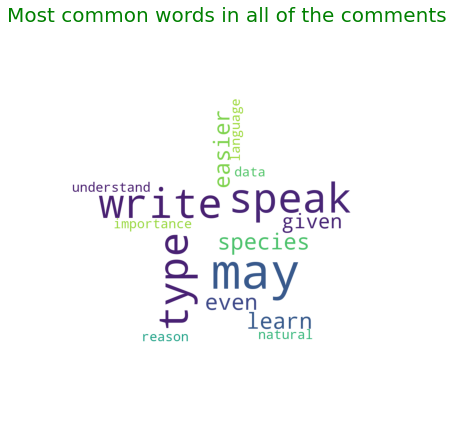

In [71]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS, ImageColorGenerator
from PIL import Image
import numpy as np


 
def wordcloud_plot(corpus,mask=None,image_color=False,figure_size=None,title =None,title_size=None):       # corpus list of sentences
    
    stopwords=set(STOPWORDS)   # stopwords    
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
    stopwords = stopwords.union(more_stopwords)
    
    corpus=[str(sent).lower() for sent in corpus]
    word_string=" ".join(corpus)  
    
    wordcloud = WordCloud(background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=200, 
                          random_state=42,
                          mask=mask)    # specifying the shape from image file
    
    wordcloud.generate(word_string)
    
    plt.figure(figsize=figure_size)
    image_colors = ImageColorGenerator(mask)   #mask is an image
        
    if image_color:
        plt.imshow(wordcloud.recolor(color_func=image_colors),interpolation="bilinear")
        plt.title(title, fontdict={'size': title_size, 'verticalalignment': 'bottom'})
        
    else:
        
        plt.imshow(wordcloud)
        plt.title(title, fontdict={'size': title_size, 'color': 'green', 'verticalalignment': 'bottom'})
        
    
    plt.axis('off');
    plt.tight_layout() 

    
    

comments_mask = np.array(Image.open('star.png'))
wordcloud_plot(corpus,image_color=False,mask=comments_mask, figure_size=(8,6),
               title = 'Most common words in all of the comments',title_size=20)



References:

https://www.kaggle.com/aashita/word-clouds-of-various-shapes

https://github.com/amueller/word_cloud

https://sebastianraschka.com/Articles/2014_twitter_wordcloud.html